<a href="https://colab.research.google.com/github/jimmymanianchira/FastAi_2019_part2/blob/master/FastAi_Lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
!git clone https://github.com/fastai/course-v3.git

Cloning into 'course-v3'...
remote: Enumerating objects: 4775, done.
remote: Total 4775 (delta 0), reused 0 (delta 0), pack-reused 4775
Receiving objects: 100% (4775/4775), 231.92 MiB | 34.03 MiB/s, done.
Resolving deltas: 100% (2570/2570), done.


In [3]:
%cd course-v3

/content/course-v3


In [4]:
%cd nbs/dl2

/content/course-v3/nbs/dl2


In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# **This is based on notebook matrix multiplication**

In [0]:

#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [0]:

#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [8]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [0]:

with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [10]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [0]:
assert n==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [13]:
img = x_train[10]
img.view(28,28).type()


'torch.FloatTensor'

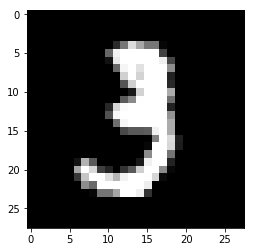

In [14]:
plt.imshow(img.view((28,28)));

In [0]:
weights=torch.randn(784,10)
bias=torch.zeros(10)

In [0]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [17]:

m1 = x_valid[:10]
m2 = weights

m1.shape,m2.shape

(torch.Size([10, 784]), torch.Size([784, 10]))

In [18]:
%time t1=matmul(m1, m2)

CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.5 s


In [19]:
t1.shape

torch.Size([10, 10])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$


In [20]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [21]:
(m*m).sum().sqrt()

tensor(16.8819)

In [0]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):

            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [23]:

%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 2.22 ms per loop


In [0]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [0]:

test_near(t1,matmul(m1, m2))

##Starting with broadcasting

In [0]:
a=tensor([5,5,-3.,])

In [27]:
a>2

tensor([1, 1, 0], dtype=torch.uint8)

In [28]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [29]:
a+m

tensor([[ 6.,  7.,  0.],
        [ 9., 10.,  3.],
        [12., 13.,  6.]])

In [30]:
a.expand_as(m)

tensor([[ 5.,  5., -3.],
        [ 5.,  5., -3.],
        [ 5.,  5., -3.]])

In [31]:
a.expand_as(m).storage()

 5.0
 5.0
 -3.0
[torch.FloatStorage of size 3]

In [32]:
a.unsqueeze(0)

tensor([[ 5.,  5., -3.]])

In [33]:
a.unsqueeze(-2)

tensor([[ 5.,  5., -3.]])

In [34]:
a[None]

tensor([[ 5.,  5., -3.]])

In [35]:
a[:,None]

tensor([[ 5.],
        [ 5.],
        [-3.]])

In [36]:
m.unsqueeze(0)

tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]])

In [37]:
m.unsqueeze(0).shape

torch.Size([1, 3, 3])

In [38]:
m.unsqueeze(1)

tensor([[[1., 2., 3.]],

        [[4., 5., 6.]],

        [[7., 8., 9.]]])

In [39]:
m.unsqueeze(1).shape

torch.Size([3, 1, 3])

In [40]:
m.unsqueeze(2)

tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]])

In [41]:
m.unsqueeze(2).shape

torch.Size([3, 3, 1])

In [42]:
m.unsqueeze(2)[0]

tensor([[1.],
        [2.],
        [3.]])

In [43]:
m[None]

tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]])

In [44]:
m[:,None]

tensor([[[1., 2., 3.]],

        [[4., 5., 6.]],

        [[7., 8., 9.]]])

In [0]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):

        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [46]:
%timeit -n 10 _= matmul(m1,m2)

10 loops, best of 3: 452 µs per loop



## Einstein summation
Einstein summation (einsum) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so np.einsum('i,i', a, b) is equivalent to np.inner(a,b). If a label appears only once, it is not summed, so np.einsum('i', a) produces a view of a with no changes."

In [0]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [48]:

%timeit -n 10 _=matmul(m1, m2)

The slowest run took 58.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 39.4 µs per loop


#####trying pytorch

In [49]:

%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 17.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 14.3 µs per loop


In [50]:

%timeit -n 10 t2 = m1@m2

10 loops, best of 3: 11.4 µs per loop


## The next part is based on Fully_connected notebook

In [51]:

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from exp.nb_01 import *
def normalize(x, m, s): return (x-m)/s
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(0.1304), tensor(0.3073))

In [0]:
x_train = normalize(x_train, train_mean, train_std)

x_valid = normalize(x_valid, train_mean, train_std)

In [0]:

#export
def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

In [55]:

n,m = x_train.shape
c = y_train.max()+1
n,m,c

(50000, 784, tensor(10))

In [0]:
# num hidden
nh = 50

In [0]:
# simplified kaiming init / he init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [0]:
def lin(x, w, b): return x@w + b

In [0]:
t1=lin(x_valid,w1,b1)

In [0]:
t2=lin(t1,w2,b2)

In [61]:
t1.mean(),t1.std()

(tensor(0.0771), tensor(1.0314))

In [62]:
t2.mean(),t2.std()

(tensor(0.5575), tensor(0.8514))

In [63]:
train_mean,train_std

(tensor(0.1304), tensor(0.3073))

In [0]:
def relu(x): return x.clamp_min(0.)

In [65]:

t = relu(lin(x_valid, w1, b1))
t.mean(),t.std()

(tensor(0.4458), tensor(0.6391))

In [66]:

# kaiming init / he init for relu
w1 = torch.randn(m,nh)*math.sqrt(2/m)

t = relu(lin(x_valid, w1, b1))
t.mean(),t.std()

(tensor(0.5372), tensor(0.8022))

In [67]:

#export
from torch.nn import init

w1 = torch.zeros(m,nh)
init.kaiming_normal_(w1, mode='fan_out')
t = relu(lin(x_valid, w1, b1))

w1.mean(),w1.std()

(tensor(0.0001), tensor(0.0504))

In [0]:
def relu(x): return x.clamp_min(0.) - 0.5

In [0]:

def model(xb):
    l1 = lin(xb, w1, b1)
    l2 = relu(l1)
    l3 = lin(l2, w2, b2)
    return l3

In [0]:

#export
def mse(output, targ): return (output.squeeze(-1) - targ).pow(2).mean()

In [0]:
y_train,y_valid = y_train.float(),y_valid.float()
preds = model(x_train)


In [72]:
y_train.shape

torch.Size([50000])

In [73]:
preds.squeeze(-1).shape

torch.Size([50000])

In [74]:
preds.squeeze().unsqueeze(-1).shape

torch.Size([50000, 1])

## Copying all gradients from Jeremeys Notebook

In [0]:

def mse_grad(inp, targ): 
 
    inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]
   
def relu_grad(inp, out):
    # grad of relu with respect to input activations
    inp.g = (inp>0).float() * out.g
    
def lin_grad(inp, out, w, b):
    # grad of matmul with respect to input
    inp.g = out.g @ w.t()
    w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)
    b.g = out.g.sum(0)

In [0]:
def forward_and_backward(inp, targ):
    # forward pass:
    l1 = inp @ w1 + b1
    l2 = relu(l1)
    out = l2 @ w2 + b2

    loss = mse(out, targ)
    

    mse_grad(out, targ)
    lin_grad(l2, out, w2, b2)
    relu_grad(l1, l2)
    lin_grad(inp, l1, w1, b1)

In [0]:

forward_and_backward(x_train, y_train)

In [0]:
test=x_train@w1 +b1

In [0]:
test.g=2

In [80]:
test.g

2

In [0]:
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig  = x_train.g.clone()

xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)

In [0]:

def forward(inp, targ):

    l1 = inp @ w12 + b12
    l2 = relu(l1)
    out = l2 @ w22 + b22

    return mse(out, targ)

In [0]:
loss=forward(xt2,y_train)
loss.backward()

In [0]:
test_near(w22.grad, w2g)
test_near(b22.grad, b2g)
test_near(w12.grad, w1g)
test_near(b12.grad, b1g)
test_near(xt2.grad, ig )

In [85]:
w22.grad

tensor([[ 1.8370],
        [ 3.1091],
        [ 3.8334],
        [ 0.8461],
        [-4.6138],
        [ 3.4990],
        [-4.4527],
        [-0.2181],
        [-8.0539],
        [-0.6527],
        [ 1.5536],
        [ 3.7410],
        [-3.8750],
        [-3.9504],
        [-0.2428],
        [-3.1960],
        [ 3.7917],
        [-1.5334],
        [ 0.9992],
        [ 1.8198],
        [-0.4030],
        [ 0.0821],
        [-2.9378],
        [-3.8937],
        [ 1.0048],
        [ 2.9429],
        [ 2.6715],
        [-0.9803],
        [-1.3778],
        [ 1.6974],
        [-0.6606],
        [ 3.9967],
        [ 0.7537],
        [-9.9524],
        [ 2.0016],
        [ 3.0125],
        [ 1.2326],
        [-1.8416],
        [ 2.3445],
        [-4.0933],
        [ 1.8966],
        [-8.1203],
        [-1.6067],
        [-9.0296],
        [ 4.0403],
        [-0.1728],
        [-6.4690],
        [-0.6347],
        [ 2.4553],
        [ 0.7446]])

In [0]:
class Relu():
  def __call__(self,inp):
    self.inp=inp
    self.out= inp.clamp_min(0.)-0.5
    return self.out
  
  def backward(self): self.inp.g = (self.inp>0).float() * self.out.g
    
    

In [0]:
class Lin():
  def __init__(self,w,b):
    self.w,self.b=w,b
  
  def __call__(self,inp):
    self.inp=inp
    self.out=inp@self.w +self.b
    return self.out
  
    
  def backward(self):
    self.inp.g = self.out.g @ self.w.t()
        # Creating a giant outer product, just to sum it, is inefficient!
    self.w.g = (self.inp.unsqueeze(-1) * self.out.g.unsqueeze(1)).sum(0)
    self.b.g = self.out.g.sum(0)
  
  

In [0]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [0]:
class Model():
  def __init__(self,w1,b1,w2,b2):
    self.layers=[Lin(w1,b1),Relu(),Lin(w2,b2)]
    self.loss=Mse()
    
  def __call__(self,x,targ):
    for l in self.layers:
      x=l(x)
    return self.loss(x,targ)
  
  def backward(self):
    self.loss.backward()
    for l in reversed(self.layers):
      l.backward()
    
  
  

In [0]:

w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model(w1, b1, w2, b2)

In [99]:

%time loss = model(x_train, y_train)

CPU times: user 109 ms, sys: 786 µs, total: 110 ms
Wall time: 109 ms


In [100]:

%time model.backward()

CPU times: user 3.4 s, sys: 3.94 s, total: 7.34 s
Wall time: 7.35 s


In [0]:
test_near(w2g, w2.g)
test_near(b2g, b2.g)
test_near(w1g, w1.g)
test_near(b1g, b1.g)
test_near(ig, x_train.g)

In [0]:
class Module():
  def __call__(self,*args):
    self.args=args
    self.out=self.forward(*args)
    return self.out
  
  def forward(self): raise Exception('not implemented')
  def backward(self): self.bwd(self.out,*self.args)

In [0]:
class Relu(Module):
    def forward(self, inp): return inp.clamp_min(0.)-0.5
    def bwd(self, out, inp): inp.g = (inp>0).float() * out.g

In [0]:
class Lin(Module):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = torch.einsum("bi,bj->ij", inp, out.g)
        self.b.g = out.g.sum(0)
        

        

In [0]:
class Mse(Module):
    def forward (self, inp, targ): return (inp.squeeze() - targ).pow(2).mean()
    def bwd(self, out, inp, targ): inp.g = 2*(inp.squeeze()-targ).unsqueeze(-1) / targ.shape[0]

In [0]:
class Model():
    def __init__(self):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2,b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x, targ)
    
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers): l.backward()

In [0]:

w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model()

In [109]:
%time loss = model(x_train, y_train)

CPU times: user 108 ms, sys: 5 µs, total: 108 ms
Wall time: 108 ms


In [110]:

%time model.backward()

CPU times: user 225 ms, sys: 21.8 ms, total: 247 ms
Wall time: 246 ms


In [0]:
test_near(w2g, w2.g)
test_near(b2g, b2.g)
test_near(w1g, w1.g)
test_near(b1g, b1.g)
test_near(ig, x_train.g)

In [0]:
from torch import nn

In [0]:
class Model(nn.Module):
  def __init__(self,n_in,nh,n_out):
    super().__init__()
    self.layers=[nn.Linear(n_in,nh),nn.ReLU(),nn.Linear(nh,n_out)]
    self.loss=mse
    
  def __call__(self, x, targ):
    for l in self.layers: x = l(x)
    return self.loss(x.squeeze(), targ)

In [0]:
model = Model(m, nh, 1)

In [117]:
%time loss = model(x_train, y_train)

CPU times: user 97.2 ms, sys: 0 ns, total: 97.2 ms
Wall time: 100 ms


In [118]:
%time loss.backward()

CPU times: user 71.5 ms, sys: 1.21 ms, total: 72.7 ms
Wall time: 73.1 ms
